<a href="https://colab.research.google.com/github/drago467/AIVN/blob/master/Data%20Visualization%20and%20Analysis%202/Advertising_FeatureSelection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('advertising.csv')
print(data.shape)
data.head()

(200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


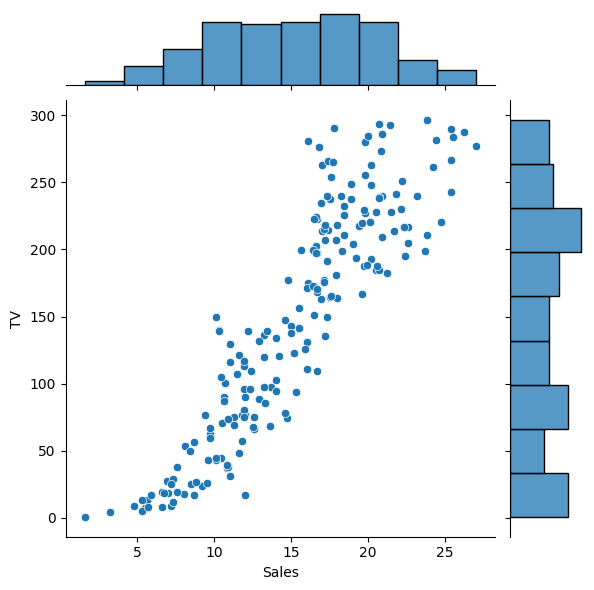

In [ ]:
sns.jointplot(x="Sales", y="TV",
              data=data)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
%matplotlib qt
np.random.seed(123)

#data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)
data = pd.read_csv('advertising.csv').to_numpy()
print(data.shape)

np.random.shuffle(data)
print(data[:5])

(200, 4)
[[199.8   3.1  34.6  16.4]
 [ 80.2   0.    9.2  11.9]
 [ 74.7  49.4  45.7  14.7]
 [ 44.7  25.8  20.6  10.1]
 [147.3  23.9  19.1  14.6]]


In [ ]:
x = data[:,:3]
y = data[:,3:]

max_value = np.max(x)
min_value = np.min(x)
avg = np.mean(x)
x = (x-avg) / (max_value-min_value)

x_b = np.c_[np.ones((200, 1)), x]
print(x_b[:5])

[[ 1.          0.44820007 -0.21543016 -0.10915486]
 [ 1.          0.0446913  -0.225889   -0.19484987]
 [ 1.          0.02613529 -0.05922233 -0.07170547]
 [ 1.         -0.07507928 -0.13884447 -0.15638833]
 [ 1.          0.27107456 -0.14525472 -0.16144906]]


In [ ]:
N = 150

x_train = x_b[:N]
y_train = y[:N]

x_test = x_b[N:]
y_test = y[N:]

print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)
print('x_test: ', x_test.shape)
print('y_test: ', y_test.shape)

x_train:  (150, 4)
y_train:  (150, 1)
x_test:  (50, 4)
y_test:  (50, 1)


## Train

In [ ]:
n_iterations = 150
learning_rate = 0.01

# khởi tạo giá trị tham số
thetas = np.random.randn(4, 1)
thetas_path = [thetas]
losses = []

for i in range(n_iterations):
    # tính output
    output = x_train.dot(thetas)

    # tính loss
    loss = (output - y_train)**2

    # tính đạo hàm cho loss
    loss_grd = 2*(output - y_train)/N

    # tính đạo hàm cho các tham số
    gradients = x_train.T.dot(loss_grd)

    # cập nhật tham số
    thetas = thetas - learning_rate*gradients
    thetas_path.append(thetas)

    mean_loss = np.sum(loss)/N
    losses.append(mean_loss)


# in loss cho 100 sample đầu
x_axis = list(range(n_iterations))
plt.plot(x_axis,losses[:n_iterations], color="r")
plt.show()

In [ ]:
print(thetas)
print('Loss: ', losses[-1])

[[12.35789638]
 [ 6.62060968]
 [-2.40250142]
 [-0.43880545]]
Loss:  13.066889824670707


In [ ]:
# test

# tính output
output = x_test.dot(thetas)

# tính loss
loss = np.abs(output - y_test)
print('Test Loss: ', loss.mean())

Test Loss:  3.366459847540656
